In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
unrate = pd.read_csv('dataset/UNRATE.csv')

In [12]:
np.random.seed(1)

index_nans = np.random.choice(len(unrate), size=int(len(unrate) * 0.2), replace=False)

unrate['UNRATE_NA_RAND'] = unrate['UNRATE'].copy()
unrate.loc[index_nans, 'UNRATE_NA_RAND'] = np.nan

<Axes: xlabel='DATE'>

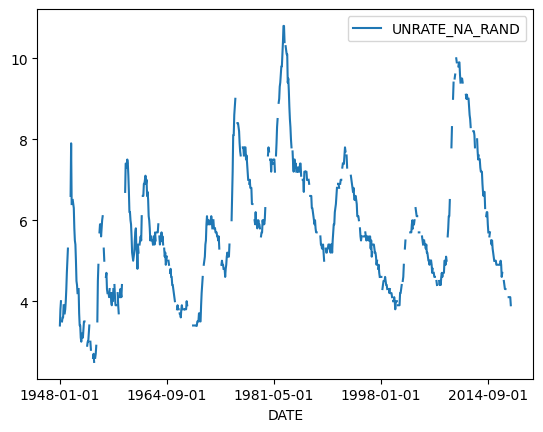

In [13]:
unrate.plot(x='DATE', y='UNRATE_NA_RAND')

### Forward fill

In [14]:
# forward fill impuntation
unrate['UNRATE_NA_FF'] = unrate['UNRATE_NA_RAND'].ffill()
unrate['boolean_na']  = unrate['UNRATE_NA_FF'].isna()
index_nans = unrate[unrate['boolean_na'] == True].index

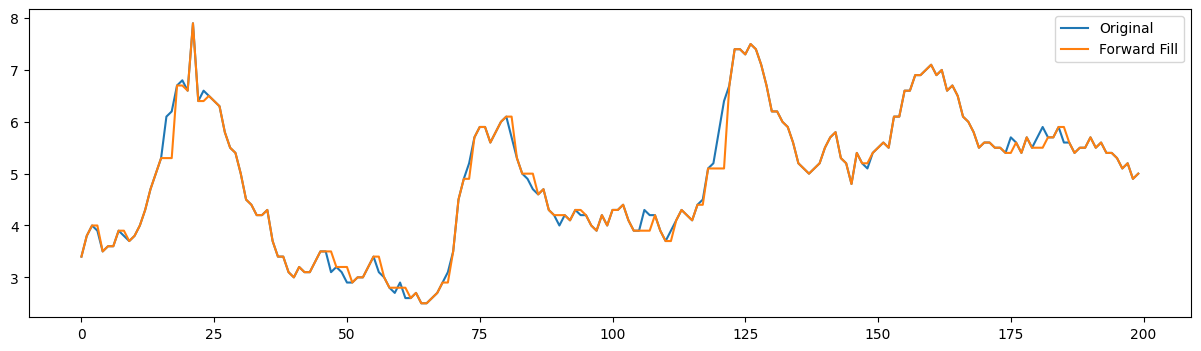

In [15]:
plt.figure(figsize=(15, 4))
plt.plot(unrate['UNRATE'][0:200], label='Original')
plt.plot(unrate['UNRATE_NA_FF'][0:200], label='Forward Fill')
plt.legend()
plt.show()

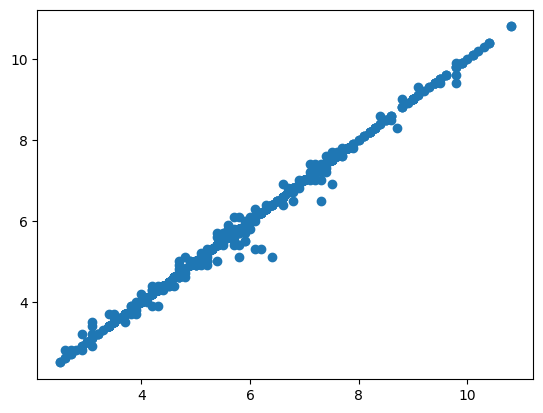

In [16]:
plt.scatter(unrate['UNRATE'], unrate['UNRATE_NA_FF'])

### Suavização no python

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [45]:
suav  = ExponentialSmoothing(endog=unrate['UNRATE'], trend='add', seasonal='add', seasonal_periods=12).fit()
suav.summary()

Dep. Variable:,UNRATE,No. Observations:,844
Model:,ExponentialSmoothing,SSE,35.073
Optimized:,True,AIC,-2652.524
Trend:,Additive,BIC,-2576.713
Seasonal:,Additive,AICC,-2651.695
Seasonal Periods:,12,Date:,"sex, 15 ago 2025"
Box-Cox:,False,Time:,12:12:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.1812757,beta,True


In [46]:
pred = suav.predict(suav.model.nobs, suav.model.nobs + 100)

In [47]:
range(len(unrate), len(unrate)+10)

range(844, 854)

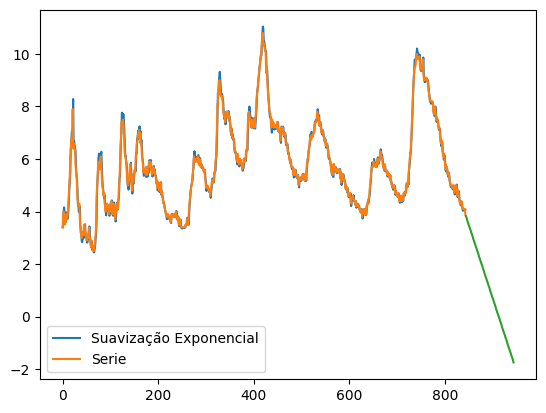

In [48]:
plt.plot(suav.fittedvalues, label='Suavização Exponencial')
plt.plot(unrate['UNRATE'], label='Serie')
plt.plot(range(len(suav.fittedvalues), len(suav.fittedvalues)+len(pred)) , pred)
plt.legend()
plt.show()